In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = keras.preprocessing.image_dataset_from_directory("lung_image_sets/", image_size=(100, 100), batch_size=32)

Found 15000 files belonging to 3 classes.


In [3]:
class_names = dataset.class_names
class_names

['lung_adenocarcinoma', 'lung_benign', 'lung_squamous_cell_carcinoma']

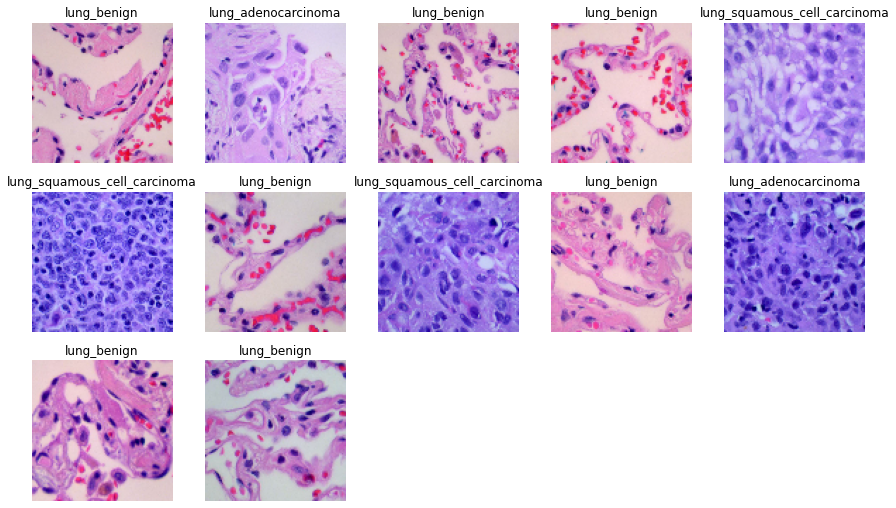

In [9]:
plt.figure(figsize=(15, 15))
for image, label in dataset.take(1):
    for i in range(12):
        plt.subplot(5, 5, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [10]:
len(dataset)

469

In [11]:
def split_dataset(dataset, train_size=0.8):
    l = len(dataset)
    train_df = dataset.take(int(l*train_size))
    rem_df = dataset.skip(int(l*train_size))
    test_df = rem_df.take(int(len(rem_df)*0.5))
    val_df = rem_df.skip(int(len(rem_df)*0.5))
    
    return train_df, test_df, val_df    
    

In [12]:
train_df, test_df, val_df = split_dataset(dataset)

In [15]:
len(train_df), len(test_df), len(val_df) 

(375, 47, 47)

In [16]:
len(dataset)

469

In [17]:
sum((375, 47, 47))

469

# Training #1

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")
])

In [20]:
model.compile(
    optimizer="adam",
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [22]:
history = model.fit(train_df, validation_data=val_df, epochs=10)

Epoch 1/10
375/375 [==============================] - 158s 422ms/step - loss: 0.3061 - accuracy: 0.8777 - val_loss: 0.2317 - val_accuracy: 0.9071
Epoch 2/10
375/375 [==============================] - 134s 356ms/step - loss: 0.2462 - accuracy: 0.9027 - val_loss: 0.2999 - val_accuracy: 0.8770
Epoch 3/10
375/375 [==============================] - 134s 357ms/step - loss: 0.1919 - accuracy: 0.9243 - val_loss: 0.1902 - val_accuracy: 0.9205
Epoch 4/10
375/375 [==============================] - 134s 355ms/step - loss: 0.1730 - accuracy: 0.9303 - val_loss: 0.1751 - val_accuracy: 0.9238
Epoch 5/10
375/375 [==============================] - 144s 384ms/step - loss: 0.1594 - accuracy: 0.9386 - val_loss: 0.1377 - val_accuracy: 0.9512
Epoch 6/10
375/375 [==============================] - 160s 426ms/step - loss: 0.1530 - accuracy: 0.9398 - val_loss: 0.1214 - val_accuracy: 0.9606
Epoch 7/10
375/375 [==============================] - 159s 422ms/step - loss: 0.1434 - accuracy: 0.9414 - val_loss: 0.1381 -

In [23]:
model.evaluate(test_df)

47/47 [==============================] - 14s 95ms/step - loss: 0.1196 - accuracy: 0.9555


[0.11961254477500916, 0.9554521441459656]

In [24]:
model.save("lung_model_cnn_acc95")

INFO:tensorflow:Assets written to: lung_model_cnn_acc95\assets
